In [64]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from fileParser import *
from question1 import *
from functools import reduce

In [65]:
def transform_to_pos_count(dictionary):
    for k,v in list(dictionary.items()):
        dictionary[k] = len(v)

def normal_dict(dictionary,normal_sum):
    for k,v in dictionary.items():
        dictionary[k] = v/normal_sum;

In [73]:
#transform seg_tag
def transformDicts(dict_train,dict_gold):
    transform_to_pos_count(dict_train);
    transform_to_pos_count(dict_gold);
    
    train_normal = sum(dict_train.values())
    gold_normal = sum(dict_gold.values())

    normal_dict(dict_train,train_normal);#dont run for 1st histogram
    normal_dict(dict_gold,gold_normal);#dont run for 1st histogram

In [67]:
def plotHist(dict_train,dict_gold):
    plt.bar(list(dict_train.keys()), dict_train.values(), color='g',alpha=0.5,label='train')
    plt.bar(list(dict_gold.keys()), dict_gold.values(), color='r',alpha = 0.5,label='gold')
    plt.legend(loc=1,fontsize=20)

In [68]:
def frequency_of_frequencies(d):
        res = {}
        for k,v in d.items():
            #print(v)
            #print(k)
            res[v] = 1 if v not in res.keys() else res[v]+1
        for k,v in res.items():
            res[k]= res[k]/len(d)
        return res

In [74]:
dicts_train = build_dicts('./input-files/heb-pos.train')
dicts_gold = build_dicts('./input-files/heb-pos.gold')

seg_tag_train = dicts_train["seg_tag"]
seg_tag_gold = dicts_gold["seg_tag"]

tag_seg_train = dicts_train["tag_seg"]
tag_seg_gold = dicts_gold["tag_seg"]

unique_tags_train = dict_with_unique_values(seg_tag_train)
unique_tags_gold = dict_with_unique_values(seg_tag_gold)
transformDicts(unique_tags_train,unique_tags_gold)


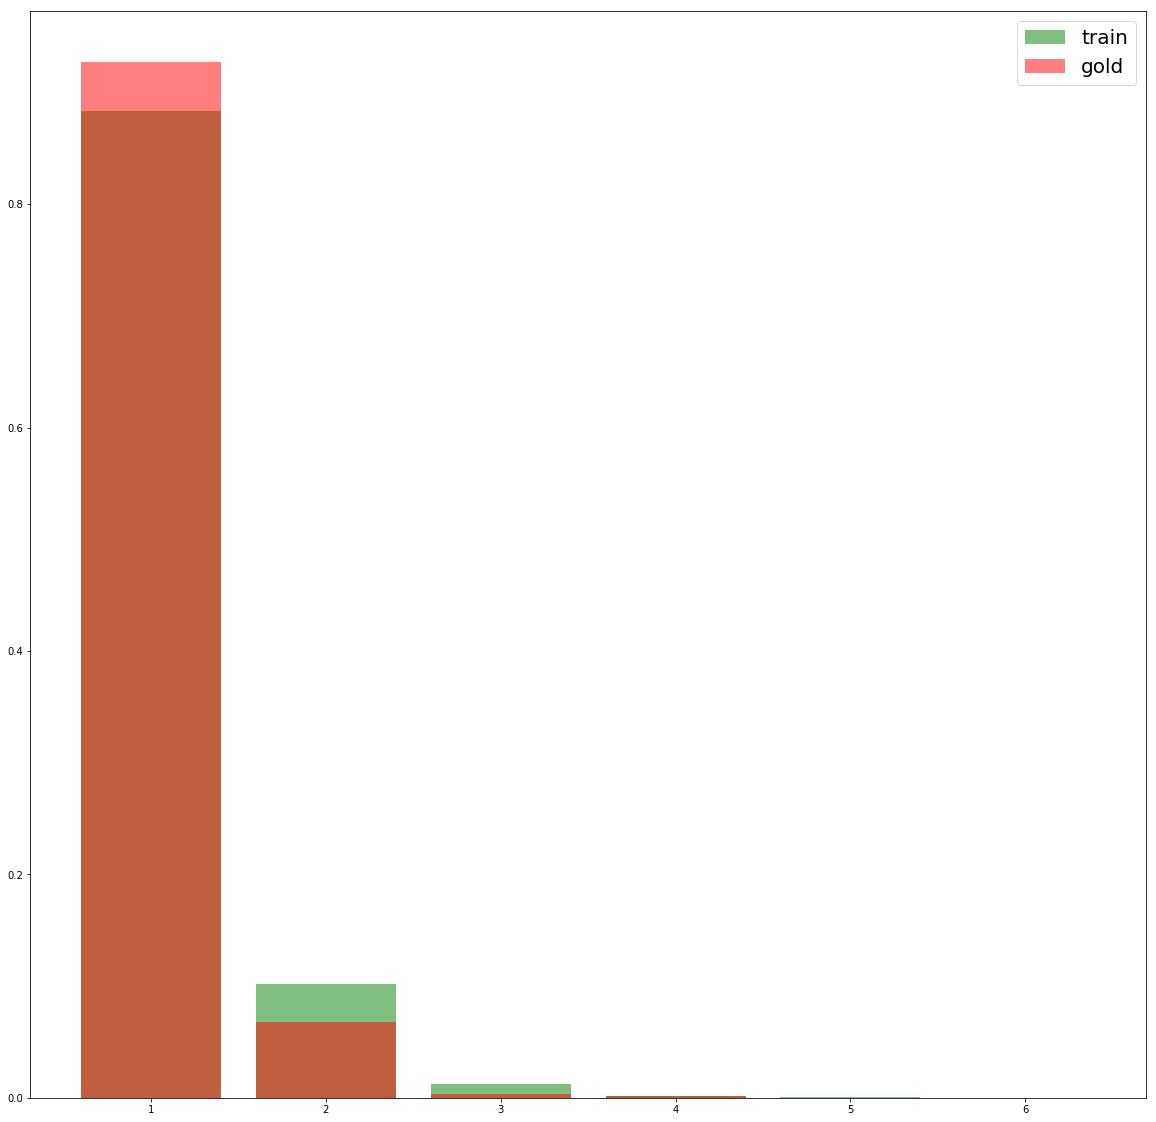

In [63]:
gold_freq  = frequency_of_frequencies(unique_tags_gold)
train_freq = frequency_of_frequencies(unique_tags_train)
plotHist(train_freq,gold_freq)
plt.show()

lower accuracy bounds for dumb classifier:

In [70]:
print(gold_freq)
print(train_freq)

{2: 0.06780195521917376, 1: 0.9271523178807947, 3: 0.00315357931251971, 4: 0.001892147587511826}
{1: 0.8832728637557863, 2: 0.10196421869135494, 5: 0.0005629926185412236, 3: 0.012385837607906918, 6: 0.00025021894157387716, 4: 0.001563868384836732}


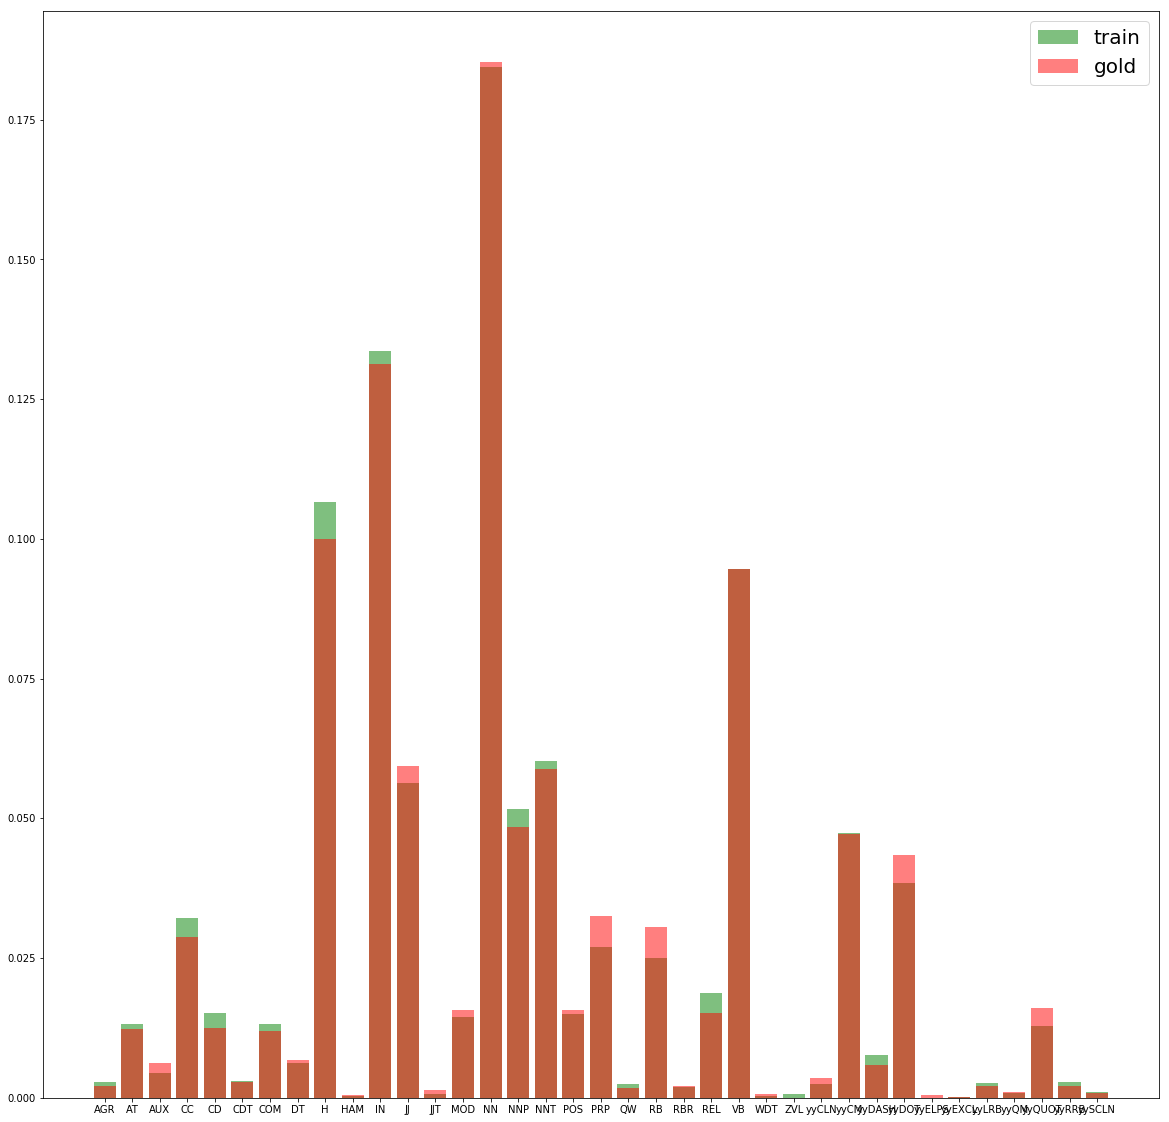

In [75]:
%matplotlib inline
plt.ion()
plt.rcParams["figure.figsize"] = [20,20]
transformDicts(tag_seg_train,tag_seg_gold)
plotHist(tag_seg_train,tag_seg_gold)
plt.show()


In [ ]:
transformDicts(seg_tag_train,seg_tag_gold)#wont run too big to plot unless removing values
plotHist(seg_tag_train,seg_tag_gold)
#plt.show(block=False)
plt.show()

In [76]:
print(len(seg_tag_train.keys()))
print(len(seg_tag_gold.keys()))

15986
3171


In [ ]:
#trying (and failing) to show segment histograms(only shows words appearing more than 50\100 times)
plotHist(seg_tag_train,seg_tag_gold)
#plt.show(block=False)
plt.show()